# Tipos de gráfico en matplotlib 


Hasta ahora sólo hemos utilizado la función `plot` para crear gráficos de línea. 

A continuación revisaremos como crear gráficas otras usuales como las nubes de puntos y los mapas de contornos con matplotlib

Utilizaremos los mismos datos de la lección pasada

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_covid = pd.read_csv("data/covid19_extract.csv").drop(["Lat", "Long", "Province/State"], axis=1)
data_covid.set_index("Country/Region", inplace=True)
data_chile = data_covid.loc["Chile"].values
data_argentina = data_covid.loc["Argentina"].values
data_bolivia = data_covid.loc["Bolivia"].values

## Nubes de puntos 

Los gráficos de nube de puntos son útiles para explorar si existe correlación entre dos conjuntos de datos

En matplotlib se crean con la función `scatter`

A continuación se muestran algunos de los argumentos principales de esta función

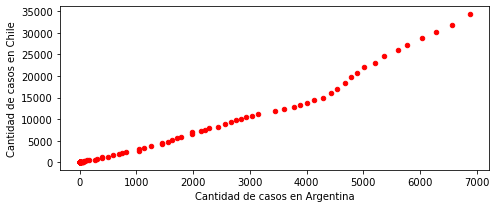

In [2]:
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)

ax.scatter(x=data_argentina, # Posición horizontal de los puntos
           y=data_chile, # Posición vertical de los puntos
           marker='o', # forma de los puntos
           s=20, # Tamaño de los puntos
           c='r', # Color de los puntos
           alpha=1.) # Opacidad de los puntos

ax.set_xlabel('Cantidad de casos en Argentina')
ax.set_ylabel('Cantidad de casos en Chile');

También es posible especificar el tamaño y el color por punto en lugar de globalmente. Esto nos permite agregar más información al gráfico

En el siguiente ejemplo se utiliza el tamaño del punto para representar la cantidad total de casos y el color la fecha

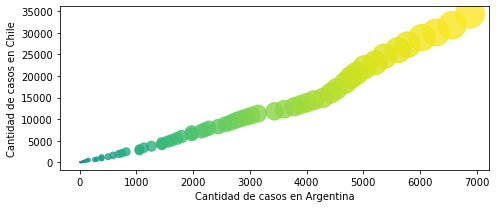

In [3]:
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)

ax.scatter(x=data_argentina,
           y=data_chile,  
           s=(data_argentina + data_chile)/50, # Cantidad total de casos (normalizado)
           c=range(len(data_argentina)), # Días
           alpha=0.8)

ax.set_xlabel('Cantidad de casos en Argentina')
ax.set_ylabel('Cantidad de casos en Chile');

Una nube de puntos también es útil si tenemos datos que no están muestreados regularmente o que tienen "espacios" que no sería correcto conectar

El siguiente ejemplo corresponde al brillo de una estrella en función del tiempo, detectado por el telescopio [Vista](https://www.eso.org/public/teles-instr/paranal-observatory/surveytelescopes/vista/). Esta serie de tiempo se conoce como [**curva de luz**](https://es.wikipedia.org/wiki/Curva_de_luz)

En este ejemplo no se sabe como varía el brillo entre cada fecha por lo que no es correcto "conectar los puntos" con una linea

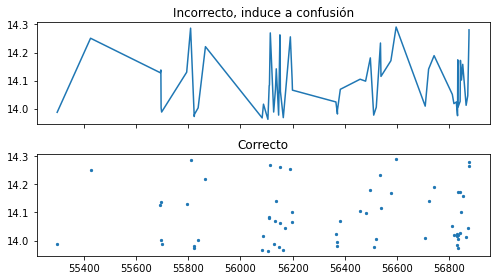

In [4]:
tiempo, brillo, error = pd.read_csv("data/rrl.dat", header=None, delim_whitespace=True).values[:, :3].T

fig, ax = plt.subplots(2, figsize=(7, 4), tight_layout=True, sharex=True)

ax[0].plot(tiempo, brillo)
ax[0].set_title('Incorrecto, induce a confusión')
ax[1].scatter(tiempo, brillo, s=5)
ax[1].set_title('Correcto');
# Se puede obtener un resultado idéntico con:
#ax[1].plot(tiempo, brillo, 'o') 

:::{important}

Conocer la naturaleza de los datos es fundamental para poder graficarlos de la mejor forma

:::

## Lineas con barras de error 

El gráfico de linea con barras de error es útil si queremos mostrar la incerteza asociada a nuestras variables. 

Podemos hacer un gráfico con barras de error con la función `errorbar`

- Se pueden agregar barras de error tanto para la variable dependiente (vertical) como la independiente (horizontal)
- La incerteza puede ser un número o un vector del mismo tamaño de la variable correspondiente

Para la curva de luz anterior teníamos información sobre el error en el brillo (variable dependiente). Podemos agregarlo al gráfico con el argumento `yerr` como sigue

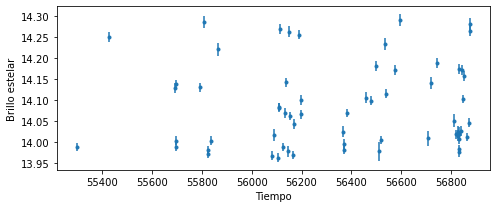

In [5]:
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)

ax.errorbar(x=tiempo, # Eje x
            y=brillo, # Eje y
            xerr=0.0, # Error en el eje x
            yerr=error, # Error en el eje y
            fmt='.', elinewidth=None, ecolor=None, capsize=None);

ax.set_xlabel('Tiempo')
ax.set_ylabel('Brillo estelar');

## Rango de datos 

Podemos utilizar la función `fill_between` para dibujar áreas

Este tipo de gráfico es útil si queremos:

- presentar la incerteza asociada a la variable dependiente
- resumir el comportamiento de varios gráficos de linea


In [6]:
data = np.vstack((data_chile, data_argentina, data_bolivia))
media = np.mean(data, axis=0)
devstd = np.std(data, axis=0)

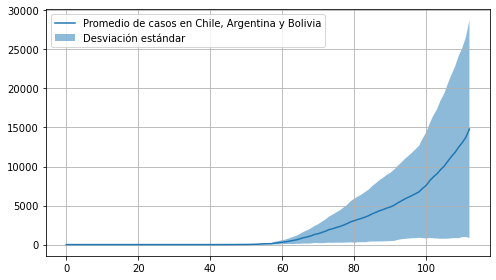

In [7]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
ax.plot(media, label='Promedio de casos en Chile, Argentina y Bolivia')
ax.fill_between(x=range(len(media)),
                y1=media - devstd, 
                y2=media + devstd, 
                alpha=0.5, label='Desviación estándar')
ax.legend(loc=2);

## Lineas sobrepuestas 

Podemos utilziar la función `stackplot` para dibujar lineas sobrepuestas

Este tipo de gráfico sirve para estudiar la contribución de múltiples variables con respecto a su valor acumulado (suma)

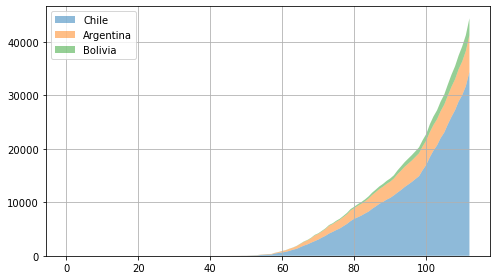

In [8]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
ax.stackplot(range(len(data_chile)), # Esto corresponde al eje horizontal
             data_chile, # Los siguientes datos se graficaran en el eje vertical
             data_argentina, 
             data_bolivia, 
             alpha=0.5, labels=('Chile', 'Argentina', 'Bolivia'));
plt.legend(loc=2);

## Gráficos de Barra

Podemos utilizar la función `bar` para crear gráficos de barra

Este tipo de gráfico sirve para comparar una cierta cantidad con respecto a distintos grupos

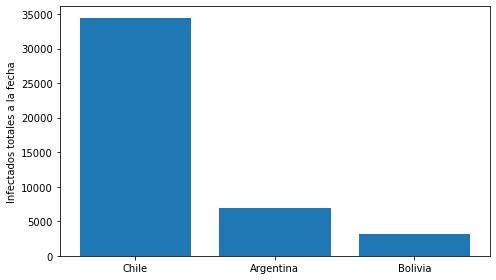

In [9]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

ax.bar(x=range(3), # Posición de las barras
       height=[data_chile[-1], data_argentina[-1], data_bolivia[-1]], # Tamaño de las barras
       width=0.8, bottom=0, align='center', # Ancho y alineación de las barras
       color=None, edgecolor=None, linewidth=None); # Color y otros aspectos estéticos

ax.set_ylabel('Infectados totales a la fecha')
ax.set_xticks(range(3))
ax.set_xticklabels(['Chile', 'Argentina', 'Bolivia']);

## Histogramas  

Podemos utilizar la función `hist` para crear y graficar histogramas con matplotlib

Un histograma es una representación de la **distribución de una o más variables** y su construcción involucra

- Medir el rango de la variable
- Dividir el rango en $N$ cajones
- Contar cuantas muestras corresponden a cada cajón

La cantidad de cajones y el rango se especifican con los argumentos `bins` y `range`, respectivamente

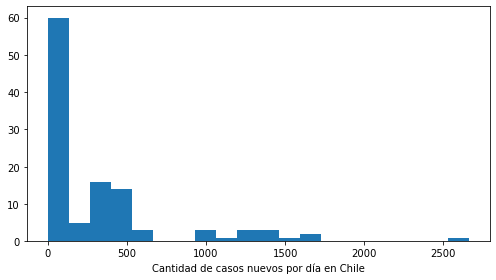

In [10]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

ax.hist(data_chile[1:] - data_chile[:-1], # Datos
        bins=20, # Cantidad de cajones por columna
        density=False, # Normalización 
        histtype='bar', color=None); # Aspectos visuales

ax.set_xlabel('Cantidad de casos nuevos por día en Chile');

:::{note}

Si los datos que recibe hist tienen forma de matriz entonces se genera un histograma por cada columna de la matriz

:::

En el siguiente ejemplo se muestra la curva de luz anterior y un histograma de los valores de brillo

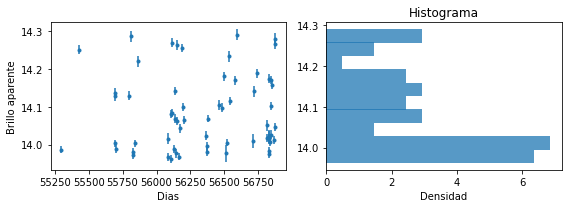

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3), 
                       tight_layout=True, facecolor='w')

ax[0].errorbar(tiempo, brillo, error, fmt='.')
ax[0].set_xlabel('Dias')
ax[0].set_ylabel('Brillo aparente')

ax[1].hist(brillo, bins=10, alpha=0.75, density=True, orientation="horizontal");
ax[1].set_title('Histograma')
ax[1].set_xlabel('Densidad');

## Diagrama de caja y bigote 

Podemos utilizar la función `boxplot` para hacer un diagrama de cajas

Este tipo de gráfico se usa para visualizar y/o comparar la distribución de varios conjuntos de datos

- La linea naranja corresponde a la media de los datos
- La parte superior e inferior de la caja corresponden al  menor y mayor cuartil, respectivamente
- Los bigotes son el rango calculado a partir de los cuartiles
- Las pelotas son puntos fuera del rango anterior (outliers)


A continuación se muestra un ejemplo con las opciones por defecto

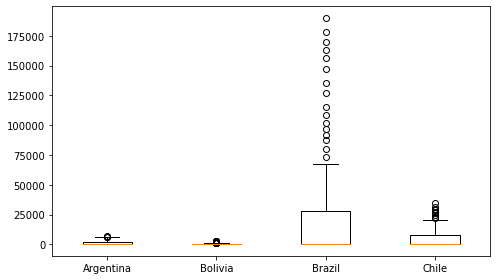

In [12]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True)

ax.boxplot(data_covid.values.T, 
           notch=False, 
           sym='o', 
           showmeans=None, 
           showcaps=None, 
           showbox=None);

ax.set_xticklabels(list(data_covid.index));

## Mapas de colores

Para visualizar funciones que varían en dos variables independientes (por ejemplo una superficie) podemos usar **Mapas de colores**

Revisaremos las siguientes opciones

- `contour` y `contourf`
- `pcolor`
- `matshow` y `imshow`

En los mapas de colores la variable dependiente (áltura) se codifica como una escala o paleta de color

[Matplotlib](https://matplotlib.org/examples/color/colormaps_reference.html) ofrece varias paletas de color que se agrupan en tres tipos

- gradiente: Para representar variables continuas 
- divergentes: Para representar variables continuas con un valor cero
- categóricas: Para representar clases 


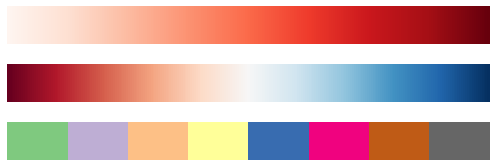

In [13]:
scale = np.tile(np.linspace(0, 1, num=256), (20, 1))
fig, ax = plt.subplots(3, figsize=(7, 3), tight_layout=True)
for ax_, cmap_ in zip(ax, [plt.cm.Reds, # Esta es una escala tipo gradiente
                           plt.cm.RdBu, # Esta es de tipo divergente
                           plt.cm.Accent] # Esta es de tipo categórica
                     ):
    ax_.imshow(scale, cmap=cmap_)
    ax_.axis('off')

**Gráficas de contornos**

Creemos datos sintéticos tridimensionales para probar los mapas de colores

In [14]:
x = np.linspace(-3, 3, num=10)
X, Y = np.meshgrid(x, x)
Z = np.exp(-0.5*(X-1)**2 - 0.5*(Y+1)**2) + np.exp(-0.5*(X+1)**2 -0.5*(Y-1)**2)

La función `contourf` crea un gráfico de contornos con el "relleno" coloreado

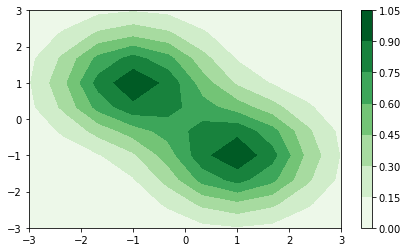

In [15]:
fig, ax = plt.subplots(figsize=(7, 4))
cplot = ax.contourf(X, Y, Z, # Los tres deben ser matrices
                    levels=6, # Permite ajustar la cantidad de escalones o niveles
                    cmap=plt.cm.Greens) # Paleta de colores

# Colorbar es útil para mostrar como varía la variable Z
fig.colorbar(mappable=cplot, ax=ax, orientation='vertical', pad=0.05); 

En cambio `contour` crea un mapa de contorno sin relleno

Se puede usar `clabel` para anotar el valor de los niveles de Z

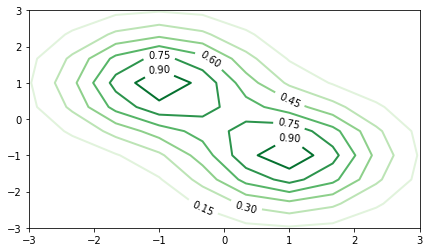

In [16]:
fig, ax = plt.subplots(figsize=(7, 4))
cplot = ax.contour(X, Y, Z, levels=6, # Igual que en contourf
                   linewidths=2, linestyles='solid', # Aspectos visuales
                   cmap=plt.cm.Greens) # Paleta

ax.clabel(cplot, # Recibe el mapa de contornos
          colors='k', fontsize=10); # Aspectos tipográficos

**Visualizando matrices e imágenes**

Las funciónes `matshow` e `imshow` pueden usarse para visualizar arreglos. La primera es para matrices, es decir arreglos bidimensionales. La segunda es para imágenes, es decir arreglos tridimensionales donde la tercera dimensión es el canal de color (RGB)

Veamos primero `matshow`

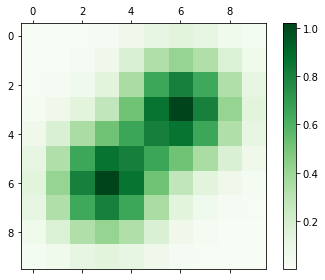

In [17]:
fig, ax = plt.subplots(figsize=(5, 4), tight_layout=True)
cplot = ax.matshow(Z, # Matriz
                   cmap=plt.cm.Greens, # Paleta
                   interpolation='none') 
fig.colorbar(cplot);

El argumento interpolación controla la suavidad entre los "píxeles", las opciones son:

```python
interpolation = {'none', 'bilinear', 'bicubic', 'gaussian', 'lanczos'}
```

Por ejemplo

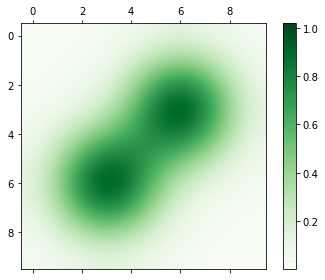

In [18]:
fig, ax = plt.subplots(figsize=(5, 4), tight_layout=True)
cplot = ax.matshow(Z, cmap=plt.cm.Greens, interpolation='bicubic') 
fig.colorbar(cplot);

Para graficar imagenes es más conveniente usar `imshow`

Matplotlib también tiene la función `imread` para importar una imagen como ndarray

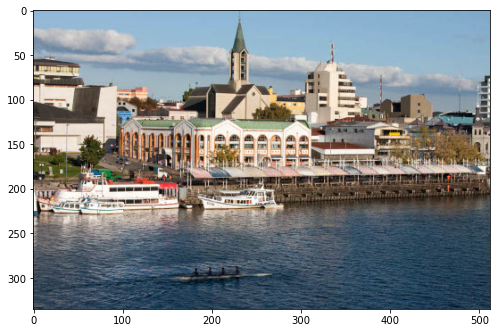

In [19]:
img = plt.imread('data/valdivia.png')
fig, ax = plt.subplots(figsize=(7, 5), tight_layout=True)
ax.imshow(img);

## Gráficas en 3D

Otra opción para visualizar la interacción entre tres variables es usar gráficos 3D

- Es necesario importar el módulo `Axes3D`
- Luego podemos usar las funciones
    - `plot_surface`
    - `contour`, `contourf`
    - `plot_wireframe`
    
Por ejemplo:

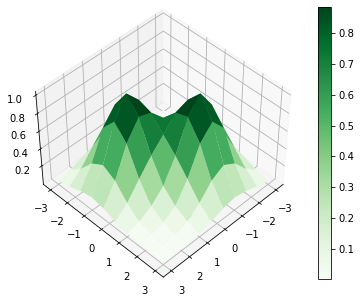

In [20]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Debemos indicar los ejes que son 3D
fig, ax = plt.subplots(figsize=(8, 5), 
                       subplot_kw={'projection': '3d'}) 

cplot = ax.plot_surface(X, Y, Z, cmap=plt.cm.Greens)
fig.colorbar(cplot)

# Podemos especificar el "ángulo de la cámara" con 
ax.view_init(45, # Elevación
             45 # Azimut 
            );

El módulo `Axes3D` puede usarse también para hacer líneas y nubes de puntos en 3D a partir de arreglos unidimensionales (vértices)

El siguiente ejemplo muestra una espiral en 3D creada usando coordenadas polares

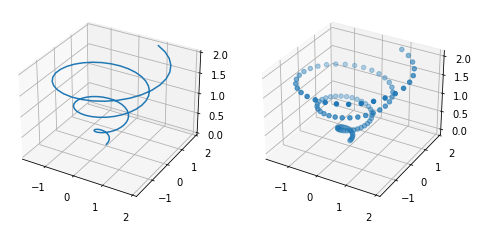

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5), 
                       subplot_kw={'projection': '3d'})

N = 100
rho = np.linspace(0, 2, num=N)
phi = np.linspace(0, 20, num=N)
x = rho*np.cos(phi)
y = rho*np.sin(phi)
z = np.linspace(0, 2, num=N)

ax[0].plot(x, y, z)
ax[1].scatter(x, y, z);